# Introdução
--------------

Filtros são sistemas lineares e invariantes no tempo que podem atuar de forma seletiva em frequências.

## Nomenclatura

$H(j\Omega)=\frac{Y(j\Omega)}{X(j\Omega)}$ Resposta de frequência

$|H(\Omega)|_{dB}$ Ganho

$H'(j\Omega) = \frac{X(j\Omega)}{Y(j\Omega)}$ Função de perda

$|H'(\Omega)|_{dB}$ Atenuação

### Como determinar $H$?

Como colocar os polos e zeros de $H$?

Hoje -> são usados algoritmos para a otimização da resposta

Passado -> escolha de famílias de funções onde o seus zeros seriam conhecidos

### Requisitos

Ganho
$BP \approx 1$
$BR \approx 0$

Perda
$BP \approx 1$
$BR \gg 0$

$BP$ é a banda de passagem

$BR$ é a banda de rejeição


Relação de Feldt-Keller

$|H'|^2 = 1 + |K|^2$ 

$K$ é a função de approximação

Requisito de $K$

1. próximo de zero dentro da banda de passagem 
2. grande o suficiente na banda de rejeição

### Butterworth
A forma mais simples de K é a função $y=x^N$
1. Entre $[0, 1]$ $y$ esta próximo de $0$
2. Quanto mais afastado de $1$ maior é o seu valor
3. Sempre $y=1$ em $x=1$
4. Ajustando para que em $x=1$ tenha atenuação $\epsilon$

### Chebyshev
O polinômio de Chebyshev é outra família de funções que satisfazem nossos requisitos para $K$.

#### Definição Trigonomêtrica:
$$C_n (x) = \begin{cases} 
cos\left(n \times cos^{-1}\left(x\right)\right), \quad se \quad |x| \leq 1 \\
cosh\left(n \times cosh^{-1}\left(x\right)\right), \quad se \quad x \geq 1 \\
(-1)^n cosh\left(n \times cosh^{-1}\left(-x\right) \right), \quad se \quad  x \leq -1
\end{cases}$$

#### Relação de Recorrência
\begin{equation} 
C_0 =1 \\
C_1 = x \\
C_{n+1} = 2x C_n(x) - C_{n-1}(x)
\end{equation}

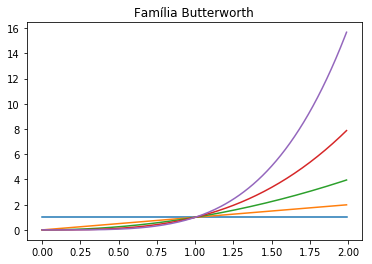

In [1]:
import numpy
import matplotlib.pyplot as plt
#from sympy import *
#init_printing()
x = numpy.arange(0, 2, 0.01)
for i in range(5):
    plt.plot(x, x**i)
plt.title('Família Butterworth')
plt.show()

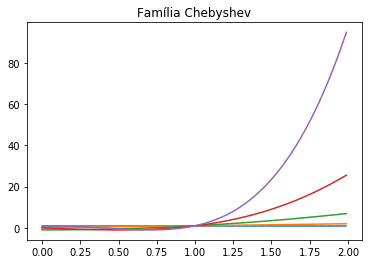

In [2]:
import math
import numpy
import matplotlib.pyplot as plt
def chebyshev(x,n):
    if(math.fabs(x)<1):
        return(math.cos(n*math.acos(x)))
    elif(x>=1):
        return(math.cosh(n*math.acosh(x)))
    else:
        return(math.pow(-1,n)*math.cosh(n*math.acosh(-1*x)))

y=numpy.arange(0,2,0.01)
for i in range(5):
    a=[chebyshev(s,i) for s in y]
    plt.plot(y,a)
plt.title('Família Chebyshev')
plt.show()

Reescrevendo a função de $K$ tem-se
$K(\omega) = \epsilon(\frac{\omega}{\omega_p})^N$
Onde:
1. $\omega_p$ é a frequência máxima na banda de passagem e possui atenução $A_{max}$.
2. $\omega_r$ é a frequência onde se tem a atenuação mínima $A_{min}$.
3. A função $K()$ é monótona crescente então a função $H'()$ também é monótona crescente
4. A função $H'()$ é maximamente plana na origem e possui todas as derivadas nulas em zero.

Da relação de Feldt-Keller:

$|H'(\Omega)|^2 = 1 + |K(\Omega)|^2$

$|H'(\Omega)|^2 =  1 + \epsilon^2(\frac{\Omega}{\Omega_p})^{2N}$

a curva de atenução é dada por: $A(\Omega) = 10\times\log_{10}(1+ \epsilon^2(\frac{\Omega}{\Omega_p})^{2N})$

Como determinar os parâmetros $\epsilon$, $N$

1. $A_{max} = A(\Omega)|_{w = \Omega_p}$, determina-se $\epsilon$
2. $A_{min} = A(\Omega)|_{w = \Omega_r}$, determina-se $N$

In [3]:
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math

def ripple(Amax):
    return(np.sqrt(10**(Amax/10)-1))

def butterworth_order(Amin,Amax,wp,wr,ceil=1):
    n = (np.log((10**(Amin/10)-1)/(ripple(Amax)**2)))/(2*np.log(wr/wp))
    if(ceil==1):
        return(math.ceil(n))
    else:
        return(n)
#### Especificações do filtro Butterworth#####
#BPassagem
Amax = 1.0
wp   = 1.0
#BRejeicao
Amin = 20.0
wr   = 2.0
##############################################

e= ripple(Amax)
display(Latex('$$\epsilon='+str(e)+'$$'))

n = butterworth_order(Amin,Amax,wp,wr,ceil=0)
n_arredondado=butterworth_order(Amin,Amax,wp,wr)
display(Latex('$$N = '+str(n)+'=>'+str(n_arredondado)+'$$'))
n = math.ceil(n)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

O módulo da Função de ganho será:

$$|H(\Omega)|^2 = \frac{1}{1+\epsilon^2(\frac{\Omega}{\Omega_p})^{2N}}$$

onde são conhecidos $\epsilon$, $N$ e $\Omega_p$.
    
#### Problema: como encontrar os pólos da função de transferência no plano $S$ se está defindo apenas em $j\Omega$?
   
   Uso da técnica conhecida como *Continuação Analítica*:
   
   $s = j\Omega$ então $-s^2 = \Omega^2$
   
   Substituindo na equação anterior tem-se, apenas os pólos:
   
   pólos = raízes de $1+\frac{\epsilon^2}{\Omega_p^N}(\Omega^2)^N$
   
   $1+\frac{\epsilon^2}{\Omega_p^N}(-s^2)^N \rightarrow \frac{\epsilon^2}{\Omega_p^{2N}}(-s^2)^N = -1$
   
#####   Primeira análise
   
  Considere o termo $\frac{\epsilon^2}{\Omega_p^{2N}} = 1$. Este é conhecido como o filtro normalizado.
   
   Neste caso:
   
   1. $N$ ímpar tem-se: $s^{2N} = 1$ cuja solução são as $2N$ raízes da unidade onde s=1 e s=-1 são soluções do problema; são raízes da forma $e^{ j\pi/N k}$
   2. $N$ par, tem-se: $s^{2N} = -1$ cuja solução é da forma $e^{ j(k\pi/N + \pi/2N)}$   
   
   As soluções reais são obtidas pela escala dos pólos do círculo unitário com o valor   $\frac{ \Omega_p}{\epsilon^{1/N}}$
   
   

In [4]:
import math
from IPython.display import display, Markdown, Latex
from sympy import *
from sympy.abc import s
from sympy.solvers import solve
from sympy import latex

def chebyshev_rec(n,x):
    if(n==0):
        return(1)
    elif(n==1):
        return(x)
    else:
        return(2*x*chebyshev_rec(n-1,x)-chebyshev_rec(n-2,x))

def chebyshev_stringrec(n,varname="x"):
    if(n-1==0):
        return('1')
    elif(n-1==1):
        return(varname)
    else:
        return("2*"+varname+"*("+chebyshev_stringrec(n-1,varname)+")-1*("+chebyshev_stringrec(n-2,varname)+")")

def chebyshev_order(Amin,Amax,wr):
    return math.ceil((math.acosh(ripple(Amax)**(-1)*math.sqrt(10**(0.1*Amin)-1)))/(math.acosh(wr)))
    
def solve_butterworth(n):
    return solve((-s**2)**n + 1)
    
def solve_chebyshev(Amin,Amax,wr,wp):
    n=chebyshev_order(Amin,Amax,wr)
    e=ripple(Amax)
    c_n=chebyshev_stringrec(n,'s')
    return solve(1+e**2 *eval(c_n)**2)
    
def show_latex(n,varname,lefthand=""):
    x = Symbol(varname)
    display(Latex("$"+lefthand+latex(simplify((eval(n))))+"$"))
    return 

########  pergunta 1   #######
#### Isso esta certo quando se compara com a resposta de frequencia ?  #####
r = wp/math.exp(1.0/n)
print('R = ', r)
######### pergunta 2 ###########
## neste ponto escreva a recorrencia da função de Chebyshev
################################
#Função Chebyshev_rec avalia o polinômio de grau n no ponto x
#Função chebyshev_string cria uma string com a fórmula analítica 

print("Polinômio caracterísitco de chebyshev:")
c=chebyshev_stringrec(n)
show_latex(c,'x')
##### essa solucao é para o filtro Butterworth normalizado ##########
#########################################################

l=solve_butterworth(n)

print('Raizes normalizadas (Butterworth):')
for i,polo in enumerate(l):
    show_latex(str(polo),"x","R_{"+str(i)+"}=")
######  Pergunta 3  #####################
### Como ficaria para o filtro Chebyshev?
##########################################
c=solve_chebyshev(Amin,Amax,wr,wp)
print('Raizes normalizadas (Chebyshev):')
for i,polo in enumerate(c):
    show_latex(str(polo),"x","R_{"+str(i)+"}=")

R =  0.8187307530779818
Polinômio caracterísitco de chebyshev:


<IPython.core.display.Latex object>

Raizes normalizadas (Butterworth):


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Raizes normalizadas (Chebyshev):


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Existem $2N$ raízes complexas

O sistema inicial previa apenas a ordem $N$ mas como foi modelado por potência houve a insersão de mais $N$. 

Neste caso, são escolhidas apenas as raízes para deixar o sistema estável e causal, $R\{raízes\} < 0$.

In [5]:
##### Pergunta 4 ################
## Use a biblioteca abaixo para reduzir a quantidade de casas decimais da resposta
import mpmath as mp
#sys.modules['sympy.mpmath'] = mpmath
#Não recomendo mudar a precisão dos cálculos. Use a função nprint 
#para reduzir o número de casas apenas no print
#Para print em latex, utilizou-se da função chop para descartar o menos significante 
######## ate aqui ###########

raizes = []
for i in range(2*n):
    a, f = cmath.polar(l[i])
    if ((f>np.pi/2) or (f<-np.pi/2)) :
        raizes.append(mp.mpc(cmath.rect(a*r,f)))
display(Markdown('#### Raízes selecionadas:'))
for i,polo in enumerate(raizes):
    display(Latex("$$R_"+str(i)+"="+mp.nstr(mp.chop(polo),2)+"$$"))


#### Raízes selecionadas:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Reescrendo a função de transferência, tem-se:

In [6]:
Q = np.poly(raizes)
display(Markdown('#### Coeficientes dos polinômios:'))
for i,roots in enumerate(Q):
    display(Latex("$$K_"+str(i)+"="+mp.nstr(mp.chop(roots),2)+"$$"))


#### Coeficientes dos polinômios:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
from lcapy import *
def show_transfer(coeficients):
    denom_latex=""
    for i,c in enumerate(coeficients):
        denom_latex=denom_latex+mp.nstr(mp.chop(c),2)+"s^"+str(len(coeficients)-i-1)+"+"
    denom_latex=denom_latex[:-1]
    display(Latex("$$H(s)=\\frac{1}{"+denom_latex+"}$$"))


H = tf(1, Q)
display(Markdown('#### Função de Transferência'))
show_transfer(Q)

#### Função de Transferência

<IPython.core.display.Latex object>

As raízes são:


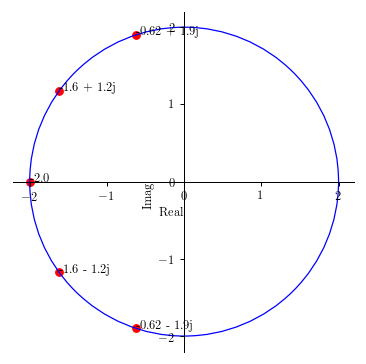

In [16]:
## Plot as raízes no espaco Z
##
##
import matplotlib.pyplot as plt
wr_rect=wr/r
plt.figure(figsize=(8, 5), dpi=90)
plt.subplot(111)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.xticks([-wr/2,-wr, 0, +wr/2,+wr])
plt.yticks([-wr/2,-wr, 0, +wr/2,+wr])
circle = plt.Circle((0, 0), radius=wr,fill=False,color='b')
plt.gca().add_patch(circle)
for p in raizes:
    im=mp.nstr(mp.chop(wr_rect*p.imag))
    re=mp.nstr(mp.chop(wr_rect*p.real))
    comp=mp.nstr(mp.chop(wr_rect*p),2).strip("()")
    plt.scatter(x=re,y=im,color='r')
    ax.annotate(comp,xy=(re,im))
plt.axis('scaled')
ax.set_xlabel('Real',horizontalalignment='right')
ax.set_ylabel('Imag',horizontalalignment='right',verticalalignment='bottom')
plt.show()

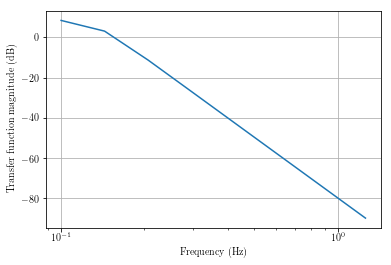

In [17]:
##### Pergunta 6 ######
#Arrume a reposta de frequencia 
# para ficar como a especificacao
#######################

A = H(j * 2 * pi * f)

fv = np.logspace(-1, .1, 8)
#fv  = np.linspace(0.0, 0.01, 80)

A.plot(fv, log_scale=True)

plt.show()

